In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

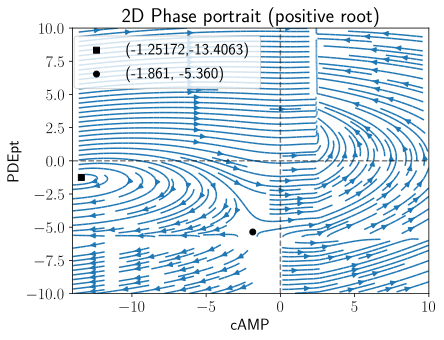

In [39]:
# credit goes to http://www.facweb.iitkgp.ac.in/~adityab/files/lec18.html


# interesting bifurcation values at k1 = 4.5 -> stable spiral at 0.8 stable node
k = 1
W0 = 6.57 #
W1 = 10
k1 = 1.09 /k
k3 = 3.5 /k #or 5.50
k2 = 5.25 /k# was good or 19

r1, r2, r3, r4 =  2.13 / k,  1.62 / k, 0.56 / k, 0.94 / k
Km1, Km2, Km3, Km4 = 1.401430143014302, 5, 5.1, 4.3
Dt =  3.116001600160016
Et = 1.5

def G(u, v, J, K):
    numerator = 2 * u * K
    den_1 = v - u + v * J + u * K
    den_2 = -4 * (v - u) * u * K
    radicand = den_1**2 + den_2
    denominator = den_1 + np.sqrt(radicand)
    return numerator / denominator

def dPDEp(cAMP, PDEpt):

    return r3 * cAMP * ((W1 - PDEpt) / Km3 + cAMP + (W1 - PDEpt)) - r4 * Et * PDEpt / (Km4 + PDEpt + Et)

def dcAMP(cAMP, PDEpt):
    numerator1 = cAMP * r1 * (-0.5 * Km2 + 0.5 * W0) + (-0.5 * cAMP * r1 - 0.5 * cAMP * r2 - 0.5 * Km1 * r2 - 0.5 * r2 * W0) * Dt
    denominator1 = cAMP * r1 - 1. * r2 * Dt

    numerator2 = cAMP ** 2 * r1 ** 2 * (Km2 ** 2 + 2. * Km2 * W0 + W0 ** 2) + cAMP * r1 * (cAMP * (2. * Km2 * r1 + 2. * Km2 * r2 + 2. * r1 * W0 - 2. * r2 * W0) + r2 * (2. * Km1 * Km2 - 2. * Km1 * W0 - 2. * Km2 * W0 - 2. * W0 ** 2)) * Dt + (cAMP ** 2 * (r1 ** 2 + 2. * r1 * r2 + r2 ** 2) + cAMP * r2 * (2. * Km1 * r1 + 2. * Km1 * r2 - 2. * r1 * W0 + 2. * r2 * W0) + r2 ** 2 * (Km1 ** 2 + 2. * Km1 * W0 + W0 ** 2)) * Dt ** 2
    denominator2 = (cAMP * r1 - 1. * r2 * Dt) ** 2
    ACpt = numerator1 / denominator1 + 0.5 * np.sqrt(numerator2 / denominator2)


    return k1 * W0 * ACpt - (k2*PDEpt + k3) * cAMP

cAMP_range = np.linspace(-14, 10, 340)
PDEp_range = np.linspace(-10, 10, 340)

CAMP, PDEP = np.meshgrid(cAMP_range, PDEp_range)
U = dcAMP(CAMP, PDEP)
V = dPDEp(CAMP, PDEP)
plt.streamplot(CAMP, PDEP, U, V, integration_direction='forward', density=1.9)
plt.scatter(-13.406, -1.251, color='black', marker='s', label='(-1.25172,-13.4063)', alpha=1, zorder=10)
plt.scatter(-1.861, -5.360, color='black', marker='o', label='(-1.861, -5.360)', zorder=10)
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.legend( loc='upper right', bbox_to_anchor=(0.55, 1.))
plt.title('2D Phase portrait (positive root)')
plt.xlim(-14, 10)
plt.ylim(-10, 10)
plt.xlabel('cAMP')
plt.ylabel('PDEpt')
plt.savefig('2D_phase_portrait_positive_root.png', bbox_inches='tight', dpi=300)
plt.show()

In [3]:
# credit goes to http://www.facweb.iitkgp.ac.in/~adityab/files/lec18.html